In [79]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Data Cleaning Level 2 - Missing Values

### Missing Value Example

Download Google Play Store Data from Kaggle.com: https://www.kaggle.com/lava18/google-play-store-apps

In [81]:
app_df = pd.read_csv('googleplaystore.csv')
app_df.set_index('App', inplace=True)
app_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up


## Get to know the data

In [82]:
Num_att = ['Rating','Reviews']
Cat_att = ['Category','Size','Installs','Type','Content Rating','Price']

In [83]:
app_df[Num_att].describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


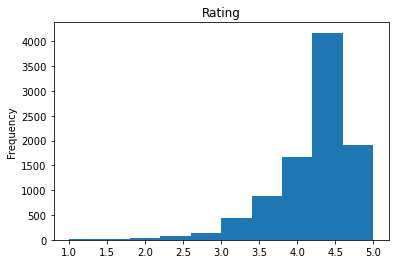

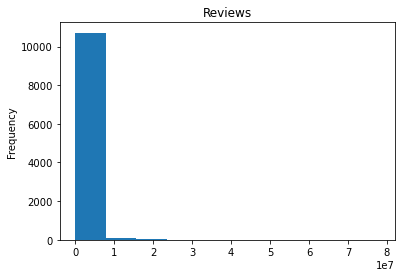

In [84]:
for att in Num_att:
    app_df[att].plot(kind='hist')
    plt.title(att)
    plt.show()

In [85]:
for att in Cat_att:
    print('Possible values for column {} are:'.format(att))
    print(app_df[att].unique())
    print('------------------------------------------')

Possible values for column Category are:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' nan]
------------------------------------------
Possible values for column Size are:
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5

# Clean Size

Each 1000KB is 1MB.

In [86]:
def cleanSize(v):
    if(v=='Varies with device'):
        return(np.nan)
    elif(v[-1:]=='M'):
        return(float(v[:-1]))
    else:
        return(float(v[:-1])*0.001)

In [87]:
app_df.Size.apply(cleanSize)

App
Photo Editor & Candy Camera & Grid & ScrapBook        19.0
Coloring book moana                                   14.0
U Launcher Lite – FREE Live Cool Themes, Hide Apps     8.7
Sketch - Draw & Paint                                 25.0
Pixel Draw - Number Art Coloring Book                  2.8
                                                      ... 
Sya9a Maroc - FR                                      53.0
Fr. Mike Schmitz Audio Teachings                       3.6
Parkinson Exercices FR                                 9.5
The SCP Foundation DB fr nn5n                          NaN
iHoroscope - 2018 Daily Horoscope & Astrology         19.0
Name: Size, Length: 10841, dtype: float64

In [88]:
app_df.Size = app_df.Size.apply(cleanSize)

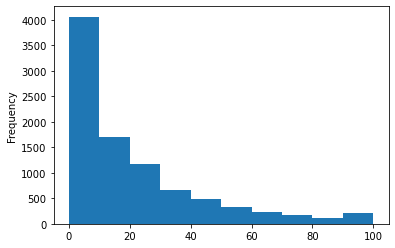

In [89]:
app_df.Size.plot(kind='hist')

In [90]:
Num_att = ['Rating','Reviews','Size']
Cat_att = ['Category','Installs','Type','Content Rating','Price']

In [91]:
app_df.Size.describe()

count    9146.000000
mean       21.514505
std        22.588343
min         0.008500
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

### Clean Price

In [92]:
app_df.Price = app_df.Price.apply(lambda v: float(v[1:]) if v[0]=='$' else float(v))

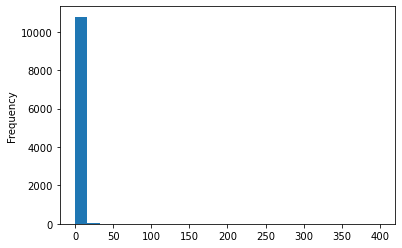

In [93]:
app_df.Price.plot(kind='hist', bins=25)

In [94]:
Num_att = ['Rating','Reviews','Size','Price']
Cat_att = ['Category','Installs','Type','Content Rating']

In [96]:
Num_att + Cat_att 

['Rating',
 'Reviews',
 'Size',
 'Price',
 'Category',
 'Installs',
 'Type',
 'Content Rating']

In [121]:
app_df = pd.DataFrame(app_df[Num_att + Cat_att])

# Missing Values

In [122]:
app_df.isna()

,Rating,Reviews,Size,Price,Category,Installs,Type,Content Rating
App,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,False,False,False,False,False,False,False,False
Coloring book moana,False,False,False,False,False,False,False,False
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",False,False,False,False,False,False,False,False
Sketch - Draw & Paint,False,False,False,False,False,False,False,False
Pixel Draw - Number Art Coloring Book,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,False,False,False,False,False,False,False,False
Fr. Mike Schmitz Audio Teachings,False,False,False,False,False,False,False,False
Parkinson Exercices FR,True,False,False,False,False,False,False,False


In [123]:
for col in app_df.columns:
    BM = app_df[col].isna()
    mv_df = app_df[BM]
    print('The number of Missing Values for column {} is {}'.format(col,len(mv_df)))

The number of Missing Values for column Rating is 1474
The number of Missing Values for column Reviews is 0
The number of Missing Values for column Size is 1695
The number of Missing Values for column Price is 0
The number of Missing Values for column Category is 1
The number of Missing Values for column Installs is 0
The number of Missing Values for column Type is 1
The number of Missing Values for column Content Rating is 0


### check if these missing values for column Rating happen with a specific pattern:

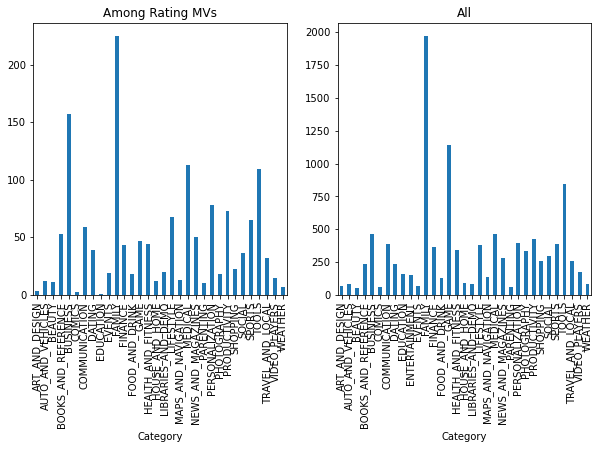

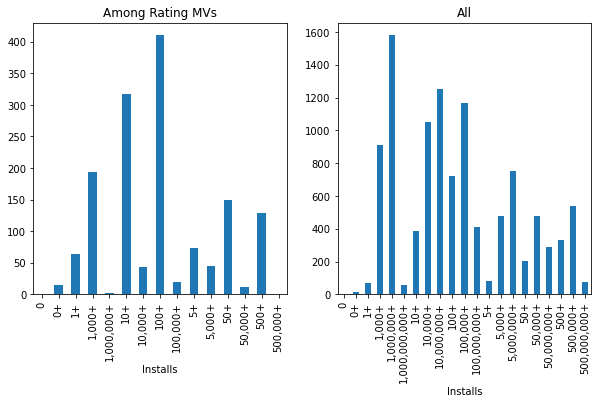

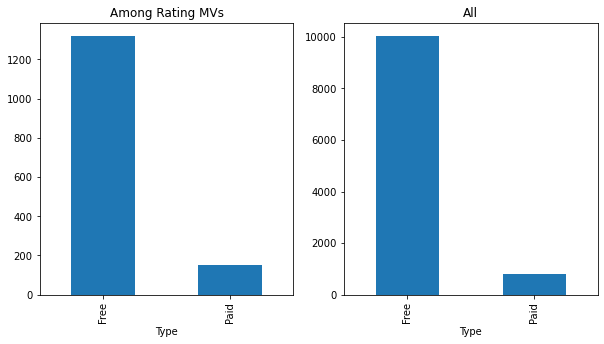

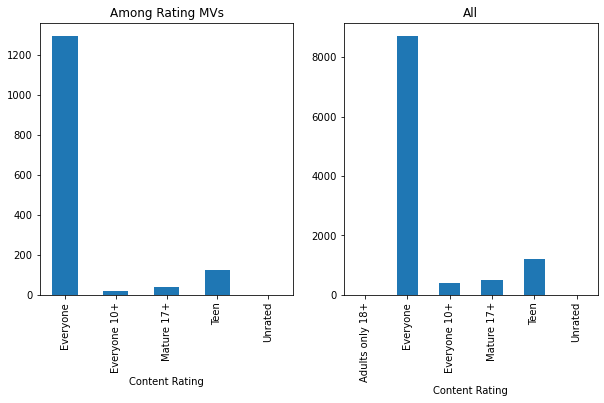

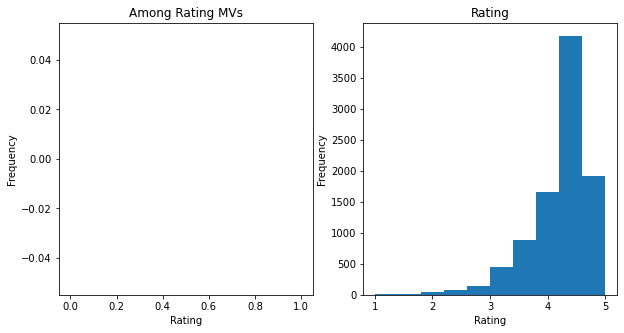

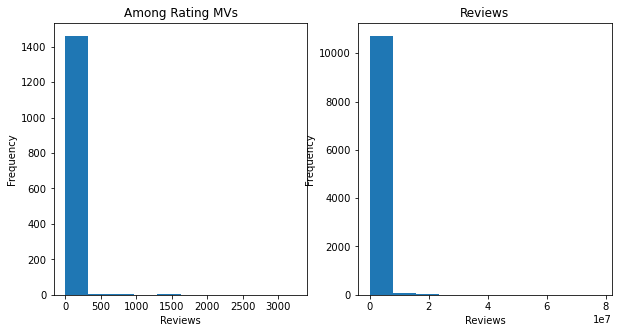

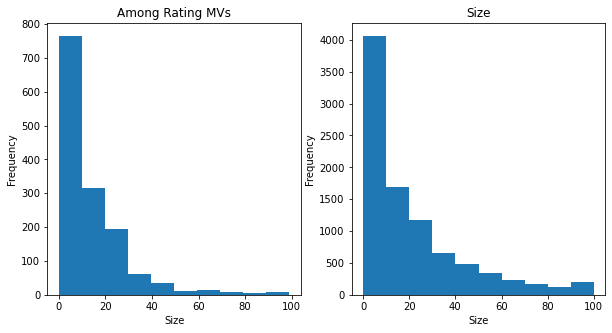

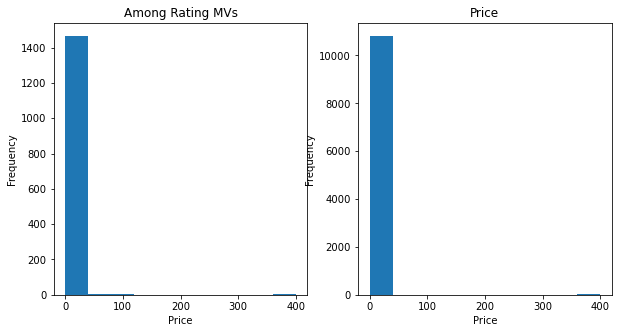

In [124]:
BM = app_df.Rating.isna()
mv_rating_df = app_df[BM]

for col in Cat_att:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    mv_rating_df.groupby(col).size().plot(kind='bar', color='C0')
    plt.title('Among Rating MVs')
    
    plt.subplot(1,2,2)
    app_df.groupby(col).size().plot(kind='bar', color='C0')
    plt.title('All')
    
    plt.show()

for col in Num_att:    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    mv_rating_df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.title('Among Rating MVs')

    plt.subplot(1,2,2)
    app_df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

The patterns of missing values of the column Rating does not indicate a relationship with the other columns, therefore, we assume these missing values are of Missing Completely at Random (MCAR). 

# MV for size

During data cleaning, we decided to change the value 'Varies with device' to np.nan which is code for a missing value. We preferred having numbers. Therefore we assume the size varying with the device is completely random and therefore these missing values are also MCAR.

# MV for Category and size
Category and size only have on missing values each, therefore, they are also MCAR. There is no pattern to be found for only one missing value. 

# Analysis one
Examine the relationship between Rating and Review columns.

#### Approach 1: Correlation analysis

In [125]:
app_df[['Rating','Reviews']].corr()

,Rating,Reviews
Rating,1.000000,0.068147
Reviews,0.068147,1.000000


In [126]:
# .dropna() drops all the missing values.
app_df[['Rating','Reviews']].dropna()

,Rating,Reviews
App,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159
Coloring book moana,3.9,967
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510
Sketch - Draw & Paint,4.5,215644
Pixel Draw - Number Art Coloring Book,4.3,967
...,...,...
FR Calculator,4.0,7
Sya9a Maroc - FR,4.5,38
Fr. Mike Schmitz Audio Teachings,5.0,4


In [127]:
app_df[['Rating','Reviews']].dropna().corr()

,Rating,Reviews
Rating,1.000000,0.068147
Reviews,0.068147,1.000000


The corr() funciton automatically drop the missing values.

#### Approach 2: scatter plot

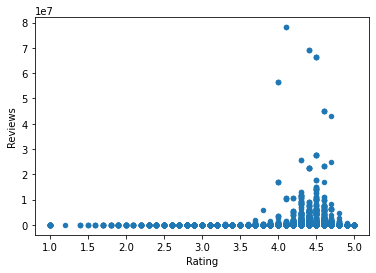

In [128]:
app_df.plot(kind='scatter',x='Rating',y='Reviews')

The values of reviews are two big therfore we use a log transformation.

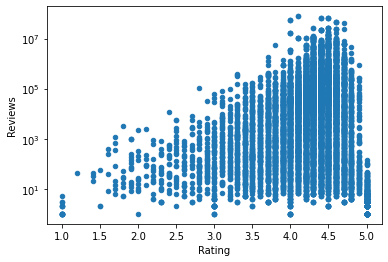

In [129]:
app_df.plot(kind='scatter',x='Rating',y='Reviews',logy=True)

In [130]:
reduced_df=app_df[['Rating','Reviews']].dropna()

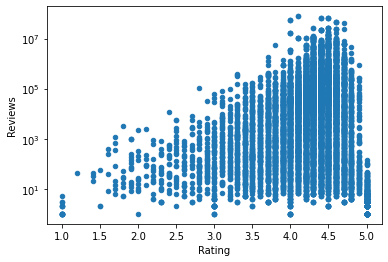

In [131]:
reduced_df.plot(kind='scatter',x='Rating',y='Reviews',logy=True)

Pandas automatically drops the missing values, which is the correct way to handle the missing values for these analysis.

# Analysis two
Use K-means to group the apps into 4 clusters based on the numerical attribues.

In [132]:
num_app_df = app_df[Num_att]
num_app_df.head()

,Rating,Reviews,Size,Price
App,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,0.0
Coloring book moana,3.9,967,14.0,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7,0.0
Sketch - Draw & Paint,4.5,215644,25.0,0.0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8,0.0


In [133]:
# fill the missing values with median of the columns. Why not means?

In [134]:
num_app_df = num_app_df.fillna(num_app_df.median())

In [135]:
# standardize the data
standard_df = (num_app_df - num_app_df.min())/(num_app_df.max()-num_app_df.min())

In [136]:
standard_df.describe()

,Rating,Reviews,Size,Price
count,10841.000000,1.084100e+04,10841.000000,10841.000000
mean,0.801566,5.682210e-03,0.201765,0.002568
std,0.120208,3.745768e-02,0.209783,0.039872
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.775000,4.861927e-07,0.058920,0.000000
50%,0.825000,2.679178e-05,0.129926,0.000000
75%,0.875000,7.007317e-04,0.259937,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000


In [137]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(standard_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=standard_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))
    print('----------------------------------------------------------------------------')

0 :  Sketch - Draw & Paint, Infinite Painter, Garden Coloring Book, Text on Photo - Fonteee, 3D Color Pixel by Number - Sandbox Art Coloring, FlipaClip - Cartoon animation, ibis Paint X, Colorfit - Drawing & Coloring, UNICORN - Color By Number & Pixel Art Coloring, Canva: Poster, banner, card maker & graphic design, Install images with music to make video without Net - 2018, Monster Truck Stunt 3D 2019, American Muscle Car Race, Offroad Oil Tanker Driver Transport Truck 2019, Tickets SDA 2018 and Exam from the State Traffic Safety Inspectorate with Drom.ru, Extreme Rally Championship, DMV Permit Practice Test 2018 Edition, Fines of the State Traffic Safety Inspectorate are official: inspection, payment of fines, Tickets + PDA 2018 Exam, Pick Your Part Garage, PakWheels: Buy & Sell Cars, BEST CAR SOUNDS, SKencar, Beauty Selfie Camera, Filters for Selfie, Sweet Selfie Beauty Camera, Selfie Camera Photo Editor & Filter & Sticker, Sticker Camera - Selfie Filters, Beauty Camera, Filters for

In [138]:
memb

App
Photo Editor & Candy Camera & Grid & ScrapBook        2
Coloring book moana                                   2
U Launcher Lite – FREE Live Cool Themes, Hide Apps    2
Sketch - Draw & Paint                                 0
Pixel Draw - Number Art Coloring Book                 2
                                                     ..
Sya9a Maroc - FR                                      0
Fr. Mike Schmitz Audio Teachings                      2
Parkinson Exercices FR                                2
The SCP Foundation DB fr nn5n                         2
iHoroscope - 2018 Daily Horoscope & Astrology         2
Length: 10841, dtype: int32

In [140]:
app_df['Cluster'] = memb
app_df

,Rating,Reviews,Size,Price,Category,Installs,Type,Content Rating,Cluster
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,0.0,ART_AND_DESIGN,"10,000+",Free,Everyone,2
Coloring book moana,3.9,967,14.0,0.0,ART_AND_DESIGN,"500,000+",Free,Everyone,2
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7,0.0,ART_AND_DESIGN,"5,000,000+",Free,Everyone,2
Sketch - Draw & Paint,4.5,215644,25.0,0.0,ART_AND_DESIGN,"50,000,000+",Free,Teen,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8,0.0,ART_AND_DESIGN,"100,000+",Free,Everyone,2
...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,4.5,38,53.0,0.0,FAMILY,"5,000+",Free,Everyone,0
Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,0.0,FAMILY,100+,Free,Everyone,2
Parkinson Exercices FR,NaN,3,9.5,0.0,MEDICAL,"1,000+",Free,Everyone,2


<Figure size 3672x360 with 0 Axes>

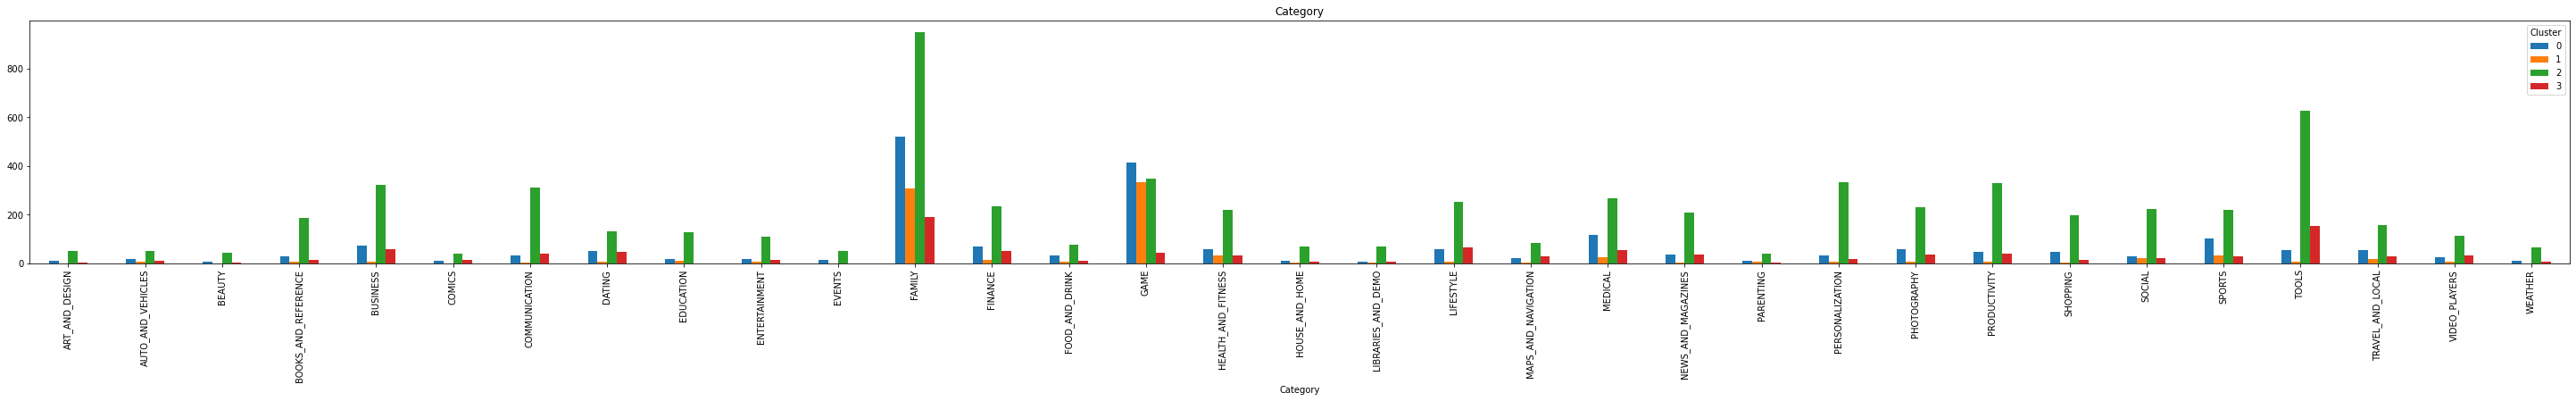

<Figure size 2268x360 with 0 Axes>

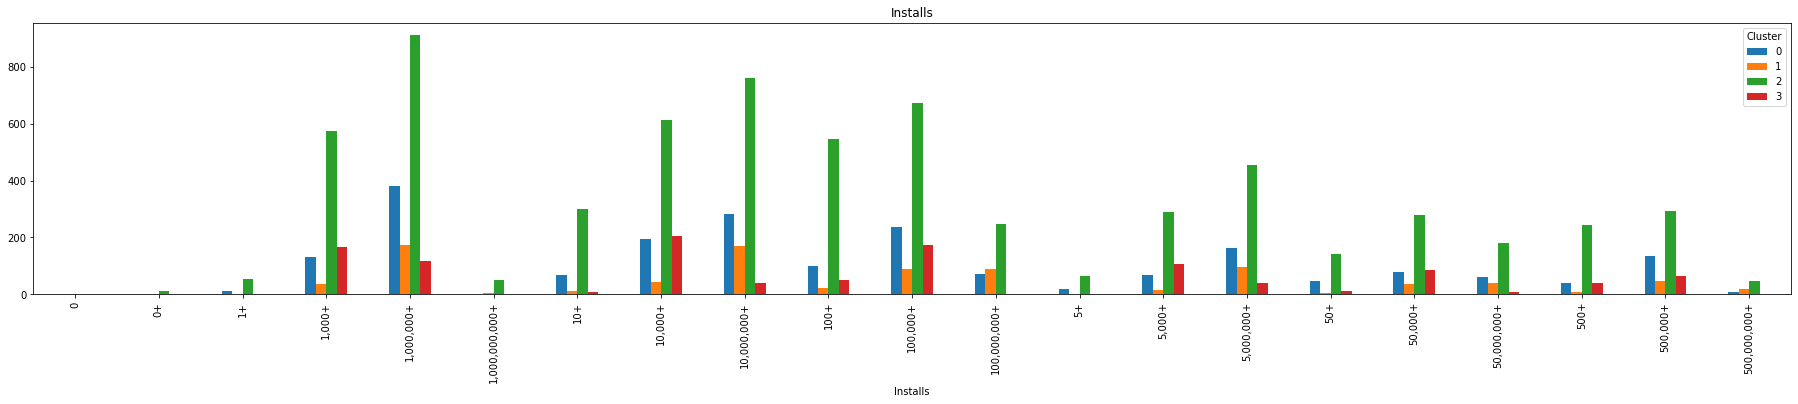

<Figure size 324x360 with 0 Axes>

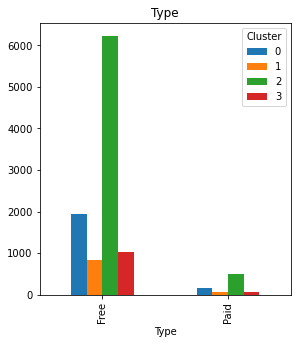

<Figure size 648x360 with 0 Axes>

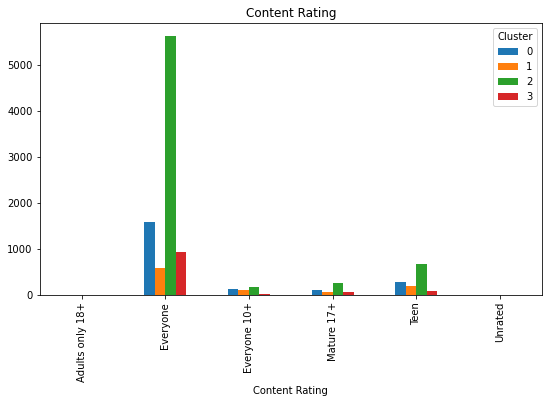

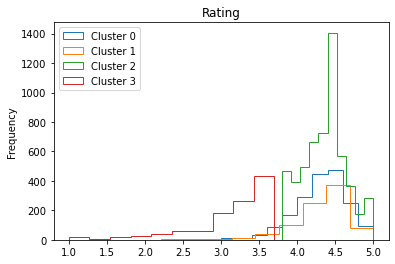

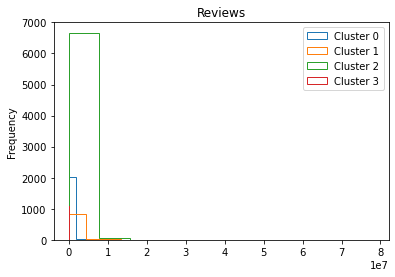

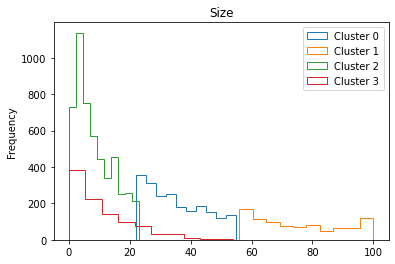

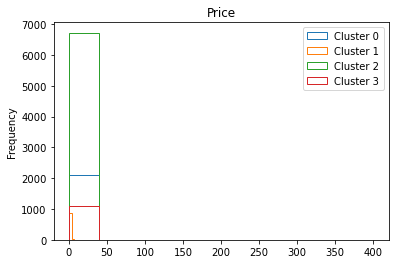

In [162]:
PossClusters = [0,1,2,3]

for col in Cat_att:
    plt.figure(figsize=(1.5*len(app_df[col].unique()),5))
    app_df.groupby([col,'Cluster']).size().unstack().plot(kind='bar',figsize=(1.5*len(app_df[col].unique()),5))
    plt.title(col)
    plt.show()
    
    
for col in Num_att:
    for clst in PossClusters:
    
        BM = app_df.Cluster == clst
        w_df = app_df[BM]
        w_df[col].plot.hist(histtype='step',label='Cluster {}'.format(clst))
    plt.legend()
    plt.title(col)
    plt.show()

Why imputing a value for clustering was the better way to address missing values?